<a href="https://colab.research.google.com/github/ihebbenalii/LLMS/blob/main/Embedding101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sentence-transformers faiss-cpu umap-learn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.8 MB/s eta 0:00:00


In [2]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [5]:
from datasets import load_dataset
dataset = load_dataset("stsb_multi_mt", name="en", split="train")
for i in range(3):
    print(f"Sentence 1: {dataset[i]['sentence1']}")
    print(f"Sentence 2: {dataset[i]['sentence2']}")
    print(f"Similarity Score: {dataset[i]['similarity_score']}\n")

Sentence 1: A plane is taking off.
Sentence 2: An air plane is taking off.
Similarity Score: 5.0

Sentence 1: A man is playing a large flute.
Sentence 2: A man is playing a flute.
Similarity Score: 3.799999952316284

Sentence 1: A man is spreading shreded cheese on a pizza.
Sentence 2: A man is spreading shredded cheese on an uncooked pizza.
Similarity Score: 3.799999952316284



In [7]:
import pandas as pd

In [11]:
df=dataset.to_pandas()
df.head()

,sentence1,sentence2,similarity_score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25


In [14]:
df['similarity_score'].describe()

,similarity_score
count,5749.000000
mean,2.700999
std,1.464402
min,0.000000
25%,1.500000
50%,3.000000
75%,3.800000
max,5.000000


In [15]:
df['similarity_score']=df['similarity_score']/5.0
df['similarity_score'].describe()

,similarity_score
count,5749.00000
mean,0.54020
std,0.29288
min,0.00000
25%,0.30000
50%,0.60000
75%,0.76000
max,1.00000


In [16]:
df=df.dropna().reset_index(drop=True)

In [32]:
from sentence_transformers import SentenceTransformer

# Load pre-trained models
model_miniLM = SentenceTransformer('all-MiniLM-L6-v2')
model_bge = SentenceTransformer('BAAI/bge-small-en-v1.5')
model_distilbert = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [33]:
sentences1 = df['sentence1'].tolist()
sentences2 = df['sentence2'].tolist()

# Generate embeddings for each model
embeddings_miniLM_1 = model_miniLM.encode(sentences1)
embeddings_miniLM_2 = model_miniLM.encode(sentences2)

embeddings_bge_1 = model_bge.encode(sentences1)
embeddings_bge_2 = model_bge.encode(sentences2)

embeddings_distilbert_1 = model_distilbert.encode(sentences1)
embeddings_distilbert_2 = model_distilbert.encode(sentences2)


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between two embeddings
def compute_similarity(embeddings1, embeddings2):
    return cosine_similarity(embeddings1, embeddings2)

# Calculate similarity for each model
similarity_miniLM = compute_similarity(embeddings_miniLM_1, embeddings_miniLM_2)
similarity_bge = compute_similarity(embeddings_bge_1, embeddings_bge_2)
similarity_distilbert = compute_similarity(embeddings_distilbert_1, embeddings_distilbert_2)

# Show the first few similarity scores
print("MiniLM Similarity Scores: ", similarity_miniLM[:5])
print("BGE Similarity Scores: ", similarity_bge[:5])
print("DistilBERT Similarity Scores: ", similarity_distilbert[:5])


MiniLM Similarity Scores:  [[ 0.9393035   0.0503601   0.09166519 ...  0.09984141  0.04707707
   0.01416149]
 [ 0.06750192  0.9020318   0.14406009 ...  0.05205213 -0.01722899
  -0.07988531]
 [ 0.0630029   0.144411    0.8920011  ...  0.04177698 -0.03707089
   0.01187189]
 [-0.00744791  0.15700437  0.12583582 ... -0.00847253  0.02963411
  -0.05192842]
 [ 0.03956953  0.564275    0.28495857 ... -0.01167006 -0.10840948
  -0.06906387]]
BGE Similarity Scores:  [[0.9742167  0.48727083 0.36754614 ... 0.35205725 0.41197246 0.4339527 ]
 [0.46693078 0.92549264 0.42857683 ... 0.27096617 0.32856253 0.29344368]
 [0.34374586 0.4406978  0.9354372  ... 0.24507818 0.26126644 0.31961143]
 [0.40576214 0.5002419  0.3420583  ... 0.3201656  0.41534352 0.22973955]
 [0.40209398 0.7313864  0.4935261  ... 0.2543602  0.2969473  0.29369926]]
DistilBERT Similarity Scores:  [[ 9.75448012e-01  9.02627036e-02 -7.31400587e-03 ... -1.45264352e-02
   6.63940981e-03  1.80976018e-01]
 [ 1.50368869e-01  8.65541935e-01  1.1397

In [35]:
import faiss
import numpy as np

# Convert embeddings to numpy arrays
embeddings_miniLM = np.concatenate([embeddings_miniLM_1, embeddings_miniLM_2], axis=1)
embeddings_bge = np.concatenate([embeddings_bge_1, embeddings_bge_2], axis=1)
embeddings_distilbert = np.concatenate([embeddings_distilbert_1, embeddings_distilbert_2], axis=1)

# FAISS Indexing
def create_faiss_index(embeddings):
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    return index

# Create indexes for each model
index_miniLM = create_faiss_index(embeddings_miniLM)
index_bge = create_faiss_index(embeddings_bge)
index_distilbert = create_faiss_index(embeddings_distilbert)

# Perform k-NN search (find nearest neighbors for a query)
k = 5  # number of nearest neighbors
D_miniLM, I_miniLM = index_miniLM.search(embeddings_miniLM, k)
D_bge, I_bge = index_bge.search(embeddings_bge, k)
D_distilbert, I_distilbert = index_distilbert.search(embeddings_distilbert, k)

# Output distances and indices for nearest neighbors
print("MiniLM distances:", D_miniLM[:5])
print("BGE distances:", D_bge[:5])
print("DistilBERT distances:", D_distilbert[:5])


MiniLM distances: [[0.0000000e+00 1.1917930e+00 1.3257928e+00 1.3925517e+00 1.4590614e+00]
 [4.7683716e-07 2.1448660e-01 4.0559411e-01 6.8218422e-01 9.6871209e-01]
 [2.3841858e-07 8.9328742e-01 1.5919418e+00 1.7537408e+00 1.9222257e+00]
 [0.0000000e+00 2.3793597e+00 2.3907099e+00 2.4889257e+00 2.5737693e+00]
 [2.3841858e-07 1.5722086e+00 1.6598442e+00 1.6956410e+00 1.7242942e+00]]
BGE distances: [[0.0000000e+00 6.2112498e-01 6.6157341e-01 7.4879146e-01 7.8474736e-01]
 [0.0000000e+00 1.5491581e-01 4.0195465e-01 5.2377701e-01 5.5334044e-01]
 [0.0000000e+00 5.7067943e-01 1.0270972e+00 1.0569565e+00 1.1718380e+00]
 [2.3841858e-07 1.3212614e+00 1.3644655e+00 1.4438057e+00 1.5453813e+00]
 [0.0000000e+00 8.4976220e-01 9.3795896e-01 9.5454192e-01 9.6498418e-01]]
DistilBERT distances: [[0.0000000e+00 2.3615887e+02 2.8231628e+02 3.1065125e+02 3.1958398e+02]
 [0.0000000e+00 8.0330566e+01 1.5587952e+02 1.6396442e+02 2.3056372e+02]
 [0.0000000e+00 1.6462512e+02 2.9663000e+02 4.3415820e+02 4.6738281

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

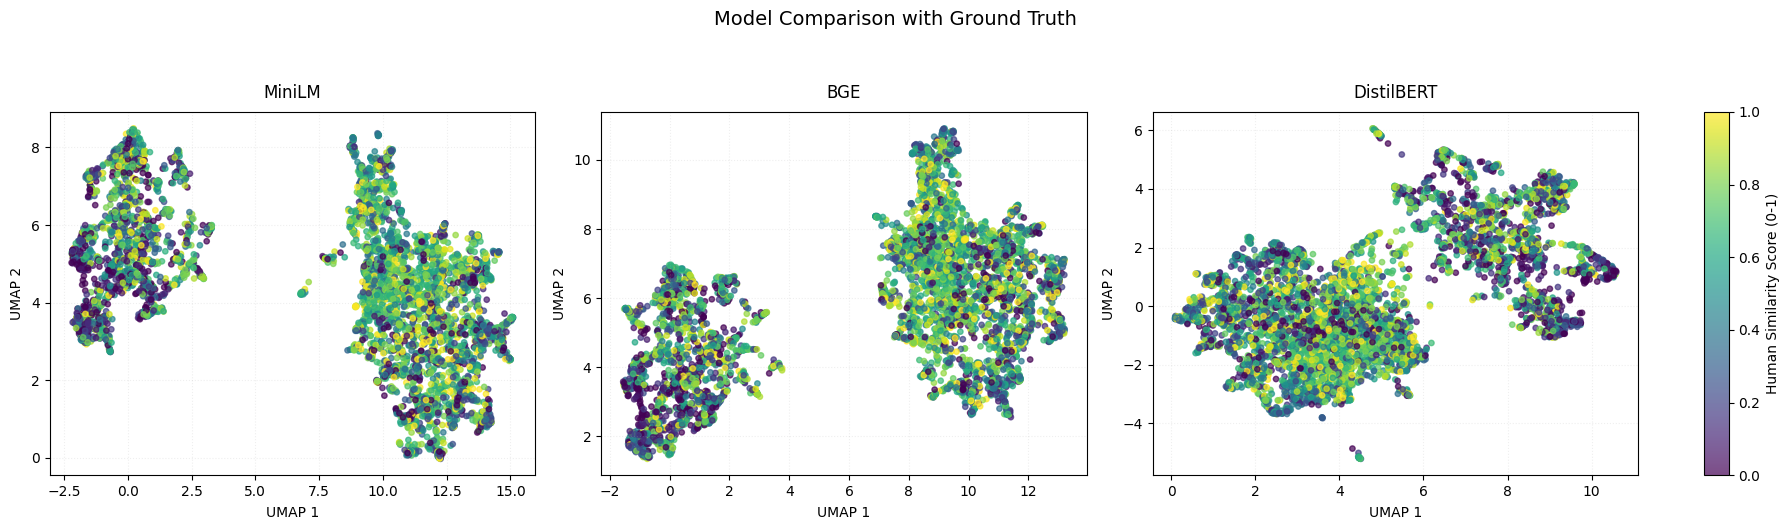

In [51]:
import umap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

def plot_umap(embeddings, model_name, similarity_scores, ax, cmap='viridis'):
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    umap_emb = reducer.fit_transform(embeddings)

    sc = ax.scatter(
        umap_emb[:, 0], umap_emb[:, 1],
        c=similarity_scores,
        cmap=cmap,
        alpha=0.7,
        s=15,
        norm=Normalize(vmin=0, vmax=1)
    )
    ax.set_title(model_name, pad=10)
    ax.set_xlabel("UMAP 1", labelpad=5)
    ax.set_ylabel("UMAP 2", labelpad=5)
    ax.grid(True, alpha=0.2, linestyle=':')
    return sc

# Create figure with adjusted layout
fig = plt.figure(figsize=(18, 5))
gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 1, 0.05])

# Create subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
cax = fig.add_subplot(gs[3])

# Plot each model
models = [
    (embeddings_miniLM, "MiniLM"),
    (embeddings_bge, "BGE"),
    (embeddings_distilbert, "DistilBERT")
]
scatters = []
for ax, (emb, name) in zip([ax1, ax2, ax3], models):
    sc = plot_umap(emb, name, df['similarity_score'], ax)
    scatters.append(sc)

cbar = fig.colorbar(scatters[0], cax=cax, label='Human Similarity Score (0-1)')
cbar.set_ticks(np.linspace(0, 1, 6))

plt.suptitle("Model Comparison with Ground Truth", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

In [38]:
import numpy as np

model_scores_miniLM = np.diag(similarity_miniLM)
model_scores_bge = np.diag(similarity_bge)
model_scores_distilbert = np.diag(similarity_distilbert)

In [40]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(human_scores, model_scores):
    return np.sqrt(mean_squared_error(human_scores, model_scores))

# Compute RMSE (use normalized or original human scores)
rmse_miniLM = calculate_rmse(df['similarity_score'], model_scores_miniLM)
rmse_bge = calculate_rmse(df['similarity_score'], model_scores_bge)
rmse_distilbert = calculate_rmse(df['similarity_score'], model_scores_distilbert)

print(f"RMSE (miniLM): {rmse_miniLM:.4f}")
print(f"RMSE (bge): {rmse_bge:.4f}")
print(f"RMSE (distilbert): {rmse_distilbert:.4f}")

RMSE (miniLM): 0.1948
RMSE (bge): 0.2907
RMSE (distilbert): 0.0536
